### In this notebook, I test some of the library functions from mylib/.

In [1]:
%reload_ext autoreload
%autoreload 2

In [23]:
import mylib.data_loaders as data_loaders
import mylib.data_transformers as data_transformers
import mylib.models_repo as models_repo
import mylib.optimizer_repo as optimizer_repo
import mylib.scheduler_repo as scheduler_repo
import mylib.trainer as trainer
import mylib.data_stats as data_stats
import mylib.transforms as local_transforms

from mylib.datasets import DatasetFromCSV

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

import pandas as pd
import os 
import numpy as np

from torchvision.datasets import ImageFolder
from PIL import Image

%matplotlib inline

In [10]:
scale_img_size = 400
crop_img_size = 224
batch_size = 128
ext = 'jpg'

### For CSV data

In [11]:
# For the Dog Breed competition

data_path = "/home/as/datasets/kaggle.dog.breed/train"
csv_file = "/home/as/datasets/kaggle.dog.breed/labels.csv"
sample_submission_file = '/home/as/datasets/kaggle.dog.breed/sample_submission.csv'

training_data = pd.read_csv(csv_file).values
sub = pd.read_csv(sample_submission_file,)
classes = list(sub)[1:]

norm = data_transformers.pytorch_zoo_normaliser
trans_aug = data_transformers.get_transformer(crop_img_size, scale_img_size, norm, True)

train_images_aug = DatasetFromCSV(training_data, classes, data_path, ext, transform=trans_aug)
train_loader_aug = data_loaders.get_data_loader(train_images_aug, batch_size)

Count:  10222
Mean Width: 443.331539816
Min Width: 97
Max Width: 3264
Mean Height: 386.747211896
Min Height: 102
Max Height: 2562
Smallest file: /home/as/datasets/kaggle.dog.breed/train/b44ddd50615e6526250b84754798c47d.jpg
Largest File: /home/as/datasets/kaggle.dog.breed/train/a7f9839ac0a874686eb418d317eae284.jpg


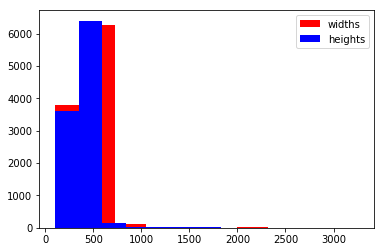

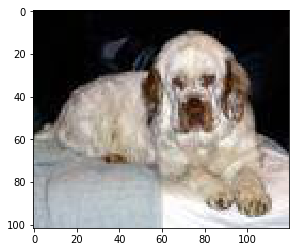

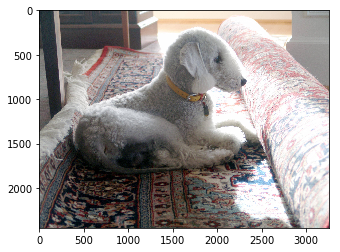

In [12]:
data_stats.get_stats_from_csv(csv_file, data_path)

In [13]:
for idx, item in enumerate(training_data):
    if item[0] == 'b44ddd50615e6526250b84754798c47d':
        print (idx)

7198


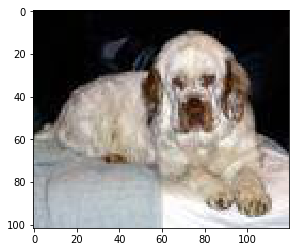

<class 'torchvision.transforms.Compose'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


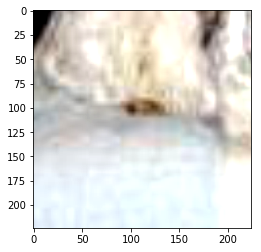

In [71]:
index = 7198

img_file = training_data[index][0] + '.jpg'
img_file = os.path.join(data_path, img_file)
img = Image.open(img_file)

plt.imshow(img)
plt.show()


tx = transforms.Compose([transforms.Scale(scale_img_size), 
                         data_transformers.MyRandomCrop((crop_img_size, crop_img_size)),
                         transforms.RandomHorizontalFlip(),
                         local_transforms.ColorJitter(0.4, 0.4, 0.4, 0)])

print(type(tx))
print(type(img))
img = tx(img)
plt.imshow(img)

### For data from folders

In [ ]:
data_path = "/home/as/datasets/fastai.dogscats"

norm = data_transformers.resnet_normaliser
trans = data_transformers.get_transformer(crop_img_size, scale_img_size, norm, False)
trans_aug = data_transformers.get_transformer(crop_img_size, scale_img_size, norm, True)
trans_valid = data_transformers.get_test_valid_transformer(crop_img_size, scale_img_size, norm)


In [ ]:
# Vanilla dataset
train_images = ImageFolder(f'{data_path}/train', transform=trans)
# Vanilla dataset
train_images_aug = ImageFolder(f'{data_path}/train', transform=trans_aug)
# For valid and test datasets
valid_images = ImageFolder(f'{data_path}/valid', transform=trans_valid)

In [ ]:
train_loader = data_loaders.get_data_loader(train_images, batch_size)
train_loader_aug = data_loaders.get_data_loader(train_images_aug, batch_size)
valid_loader = data_loaders.get_data_loader(valid_images, batch_size)

In [ ]:
data_stats.get_stats_from_path(os.path.join(data_path, 'train'))

In [ ]:
img_file = '/home/as/datasets/fastai.dogscats/train/cats/cat.6402.jpg'
img = Image.open(img_file)

plt.imshow(img)
plt.show()


tx = transforms.Compose([transforms.Scale(scale_img_size), 
                         data_transformers.MyRandomCrop((crop_img_size, crop_img_size))])

print(type(tx))
print(type(img))
img = tx(img)
plt.imshow(img)